# Exercises

In [1]:
#import
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# from matplotlib import style
import seaborn as sns
%matplotlib inline

import acquire as a
import prepare as prep


The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.

## Acquire

In [2]:
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
df1 = pd.read_csv("anonymized-curriculum-access-07-2021.txt", 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 2, 3, 4, 5])
df1.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018810 entries, 0 to 1018809
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1018810 non-null  object 
 1   endpoint   1018809 non-null  object 
 2   user_id    1018810 non-null  int64  
 3   cohort_id  965313 non-null   float64
 4   source_ip  1018810 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.9+ MB


In [4]:
a.miss_dup_values(df1)

Your selected dataframe has 5 columns.
There are 2 columns that have missing values.
  
** There are 394392 duplicate rows that represents 38.71% of total Values**


,Missing Values,% of Total Values
cohort_id,53497,5.3
endpoint,1,0.0


In [19]:
#acquire cohorts data
sql_query ='''
SELECT * FROM cohorts;
'''

In [20]:
df2 = a.get_data_from_sql('curriculum_logs', sql_query)

In [21]:
df2.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


In [22]:
df2.created_at.value_counts()

2016-06-14 19:52:26    13
2020-11-02 20:43:58     1
2020-02-24 15:39:33     1
2019-05-28 18:41:05     1
2019-01-20 23:18:57     1
2021-01-20 21:31:11     1
2016-10-26 02:34:05     1
2019-09-16 13:07:04     1
2020-01-13 21:17:08     1
2018-12-06 17:04:19     1
2019-03-18 20:35:06     1
2017-09-27 20:22:41     1
2018-09-17 19:09:51     1
2019-11-04 18:27:07     1
2020-02-03 19:31:51     1
2020-03-23 17:52:16     1
2021-04-12 18:07:21     1
2019-08-20 14:38:55     1
2017-02-06 17:49:10     1
2020-05-26 19:22:44     1
2017-03-28 00:33:12     1
2016-09-26 15:58:53     1
2021-03-15 19:57:09     1
2020-07-20 19:04:00     1
2021-03-03 21:50:49     1
2017-07-31 19:34:11     1
2020-09-21 18:06:27     1
2018-07-23 15:02:25     1
2020-07-13 18:32:19     1
2018-11-05 15:26:37     1
2018-03-05 14:22:11     1
2016-07-18 19:06:27     1
2020-12-07 16:58:43     1
2021-03-15 18:18:20     1
2018-01-08 13:59:10     1
2019-02-04 20:13:32     1
2018-05-25 22:25:57     1
2020-12-07 15:20:18     1
2019-07-15 1

In [24]:
df2.updated_at.value_counts()

2016-06-14 19:52:26    13
2020-11-02 20:43:58     1
2018-09-17 19:09:51     1
2021-03-15 18:18:20     1
2019-09-16 13:07:04     1
2020-09-30 15:54:53     1
2020-01-13 21:17:08     1
2018-12-06 17:04:19     1
2020-09-21 18:06:27     1
2019-03-18 20:35:06     1
2019-11-04 18:27:07     1
2021-01-20 21:31:11     1
2021-03-03 21:52:56     1
2020-03-23 17:52:16     1
2020-07-29 18:41:13     1
2020-09-30 15:54:46     1
2021-04-12 18:07:21     1
2019-08-20 14:38:55     1
2017-02-06 17:49:10     1
2020-02-03 19:31:51     1
2019-01-20 23:18:57     1
2016-09-26 15:58:53     1
2019-02-04 20:13:32     1
2020-12-07 15:20:18     1
2017-08-08 21:59:33     1
2018-07-23 15:02:25     1
2020-07-13 18:32:19     1
2018-03-05 14:22:11     1
2016-07-18 19:06:27     1
2019-05-28 18:41:05     1
2020-12-07 16:58:43     1
2017-09-27 20:22:41     1
2018-01-08 13:59:10     1
2016-10-26 14:30:19     1
2018-05-25 22:25:57     1
2019-07-15 16:57:21     1
2021-03-15 19:57:09     1
2017-03-28 00:33:12     1
2018-11-05 1

In [23]:
df2.deleted_at.value_counts()

Series([], Name: deleted_at, dtype: int64)

In [203]:
#acquire function
def acquire ():
    #aquire first data frame
    colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
    df1 = pd.read_csv("anonymized-curriculum-access-07-2021.txt", 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 2, 3, 4, 5])
    
    #acquire second df
    df2 = a.get_data_from_sql('curriculum_logs', sql_query)
    #drop columns that we don't need
    df2 = df2.drop(columns =['slack', 'created_at', 'deleted_at','updated_at'])
    
    #merge
    df = df1.merge(df2, left_on='cohort_id', right_on= 'id', how = 'left')
    
    # drop id because it is duplicated
    df.drop(columns= ['id'],inplace = True)
    
    return df
    

## Prepare

In [204]:
a.miss_dup_values(df2)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
deleted_at,53,100.0


In [8]:
#drop columns that we don't need
df2 = df2.drop(columns =['slack', 'created_at', 'deleted_at','updated_at'])

In [9]:
df1.cohort_id.isna().sum()

53497

In [10]:
df1.shape, df2.shape


((1018810, 5), (53, 5))

In [11]:
df = df1.merge(df2, left_on='cohort_id', right_on= 'id', how = 'left')

In [12]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip,id,name,start_date,end_date,program_id
0,2018-01-26,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0


In [13]:
df.shape

(1018810, 10)

In [14]:
# drop id because it is duplicated
df.drop(columns= ['id'],inplace = True)

In [15]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
0,2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [213]:
df.program_id.value_counts()

2.0    791196
3.0    122002
1.0     41110
4.0         5
Name: program_id, dtype: int64

In [214]:
df[df.program_id == 4]

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
31627,2018-03-22,/,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0
31628,2018-03-22,content/html-css,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0
31629,2018-03-22,content/html-css/gitbook/images/favicon.ico,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0
31630,2018-03-22,content/html-css,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0
31631,2018-03-22,content/html-css/introduction.html,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0


In [215]:
df[df.user_id == 152]

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
31627,2018-03-22,/,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0
31628,2018-03-22,content/html-css,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0
31629,2018-03-22,content/html-css/gitbook/images/favicon.ico,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0
31630,2018-03-22,content/html-css,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0
31631,2018-03-22,content/html-css/introduction.html,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0


In [16]:
a.miss_dup_values(df)

Your selected dataframe has 9 columns.
There are 6 columns that have missing values.
  
** There are 394392 duplicate rows that represents 38.71% of total Values**


,Missing Values,% of Total Values
name,64497,6.3
start_date,64497,6.3
end_date,64497,6.3
program_id,64497,6.3
cohort_id,53497,5.3
endpoint,1,0.0


In [17]:
df[df.name.isnull() & (df.cohort_id.isnull() == False)]

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
974406,2021-06-15,/,1026,165.0,24.242.17.211,NaN,NaN,NaN,NaN
974407,2021-06-15,/,1027,165.0,69.153.21.120,NaN,NaN,NaN,NaN
974408,2021-06-15,/,1028,165.0,99.66.110.207,NaN,NaN,NaN,NaN
974409,2021-06-15,/,1029,165.0,67.10.172.51,NaN,NaN,NaN,NaN
974410,2021-06-15,/,1030,165.0,162.238.132.211,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1018759,2021-07-15,python/intro-to-numpy,1026,165.0,24.242.17.211,NaN,NaN,NaN,NaN
1018778,2021-07-15,python/intro-to-numpy,1051,165.0,209.182.242.80,NaN,NaN,NaN,NaN
1018785,2021-07-15,python/intro-to-numpy,1037,165.0,173.174.155.221,NaN,NaN,NaN,NaN
1018786,2021-07-15,python/intro-to-numpy,1041,165.0,70.235.249.134,NaN,NaN,NaN,NaN


In [218]:
df[df.cohort_id==28]

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
166284,2018-12-06,appendix/further-reading/java/intellij-tomcat-...,53,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2.0
166294,2018-12-06,javascript-i,314,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2.0
166295,2018-12-06,javascript-i/coffee-project,314,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2.0
166521,2018-12-06,spring,40,28.0,170.248.173.247,Staff,2014-02-04,2014-02-04,2.0
166522,2018-12-06,spring/fundamentals/security,40,28.0,170.248.173.247,Staff,2014-02-04,2014-02-04,2.0
...,...,...,...,...,...,...,...,...,...
1018721,2021-07-15,javascript-i/loops,893,28.0,70.120.31.121,Staff,2014-02-04,2014-02-04,2.0
1018726,2021-07-15,java-ii/file-io,816,28.0,76.187.230.164,Staff,2014-02-04,2014-02-04,2.0
1018787,2021-07-15,anomaly-detection/time-series-anomaly-detector,581,28.0,97.105.19.60,Staff,2014-02-04,2014-02-04,2.0
1018803,2021-07-15,sql/mysql-overview,11,28.0,97.105.19.60,Staff,2014-02-04,2014-02-04,2.0


In [219]:
df[['cohort_id']][df.name.isnull() & (df.cohort_id.isnull() == False)].value_counts()

cohort_id
165.0        9171
166.0        1829
dtype: int64

**there are some cohort id df 165, 166 whithout name**

In [220]:
df.program_id.value_counts()

2.0    791196
3.0    122002
1.0     41110
4.0         5
Name: program_id, dtype: int64

In [221]:
#add names to the cohort missing
df.name[df.cohort_id == 165].fillna('cohort165')

974406     cohort165
974407     cohort165
974408     cohort165
974409     cohort165
974410     cohort165
             ...    
1018759    cohort165
1018778    cohort165
1018785    cohort165
1018786    cohort165
1018802    cohort165
Name: name, Length: 9171, dtype: object

In [222]:
df.name[df.cohort_id == 165] = df.name[df.cohort_id == 165].fillna('cohort165')

In [223]:
df[['name']][df.cohort_id == 165]

,name
974406,cohort165
974407,cohort165
974408,cohort165
974409,cohort165
974410,cohort165
...,...
1018759,cohort165
1018778,cohort165
1018785,cohort165
1018786,cohort165


In [224]:
df.name[df.cohort_id == 166] = df.name[df.cohort_id == 166].fillna('cohort166')

In [225]:
df.name[df.cohort_id == 166]

995542     cohort166
995543     cohort166
995544     cohort166
995545     cohort166
995546     cohort166
             ...    
1018646    cohort166
1018647    cohort166
1018663    cohort166
1018664    cohort166
1018714    cohort166
Name: name, Length: 1829, dtype: object

In [226]:
a.miss_dup_values(df)

Your selected dataframe has 9 columns.
There are 6 columns that have missing values.
  
** There are 394392 duplicate rows that represents 38.71% of total Values**


,Missing Values,% of Total Values
start_date,64497,6.3
end_date,64497,6.3
program_id,64497,6.3
cohort_id,53497,5.3
name,53497,5.3
endpoint,1,0.0


In [227]:
# fill nulls with zero
df[['start_date', 'end_date', 'program_id']]=df[['start_date', 'end_date', 'program_id']].fillna(0)

In [228]:
df.program_id.value_counts()

2.0    791196
3.0    122002
0.0     64497
1.0     41110
4.0         5
Name: program_id, dtype: int64

In [229]:
a.miss_dup_values(df)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.
  
** There are 394392 duplicate rows that represents 38.71% of total Values**


,Missing Values,% of Total Values
cohort_id,53497,5.3
name,53497,5.3
endpoint,1,0.0


In [230]:
#lets see if we can check the missing values of cohort-id
df[df.cohort_id.isnull()]

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
411,2018-01-26,/,48,NaN,97.105.19.61,NaN,0,0,0.0
412,2018-01-26,spring/extra-features/form-validation,48,NaN,97.105.19.61,NaN,0,0,0.0
425,2018-01-26,/,48,NaN,97.105.19.61,NaN,0,0,0.0
435,2018-01-26,/,48,NaN,97.105.19.61,NaN,0,0,0.0
436,2018-01-26,mysql/relationships/joins,48,NaN,97.105.19.61,NaN,0,0,0.0
...,...,...,...,...,...,...,...,...,...
1013475,2021-07-12,java-i/syntax-types-and-variables,810,NaN,162.92.128.83,NaN,0,0,0.0
1014540,2021-07-13,/,727,NaN,172.58.96.119,NaN,0,0,0.0
1015184,2021-07-13,/,728,NaN,70.130.121.144,NaN,0,0,0.0
1017791,2021-07-14,/,810,NaN,75.28.22.72,NaN,0,0,0.0


In [231]:
 #let's see by user_id all the missing values
df[df.cohort_id.isnull()].groupby('user_id').count()

,date,endpoint,cohort_id,source_ip,name,start_date,end_date,program_id
user_id,,,,,,,,
48,1581,1581,0,1581,0,1581,1581,1581
54,146,146,0,146,0,146,146,146
58,462,462,0,462,0,462,462,462
59,42,42,0,42,0,42,42,42
61,816,816,0,816,0,816,816,816
...,...,...,...,...,...,...,...,...
744,69,69,0,69,0,69,69,69
782,370,370,0,370,0,370,370,370
810,793,793,0,793,0,793,793,793


In [232]:
#let's see if the user_id = 48 has cohort associated
df[df.user_id == 48].cohort_id.value_counts()

Series([], Name: cohort_id, dtype: int64)

In [233]:
#there is no  48 user_id associated to a cohort_id

In [234]:
df.cohort_id[df.user_id == 47].value_counts()

21.0    183
Name: cohort_id, dtype: int64

In [235]:
df[df.user_id == 48]

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
411,2018-01-26,/,48,NaN,97.105.19.61,NaN,0,0,0.0
412,2018-01-26,spring/extra-features/form-validation,48,NaN,97.105.19.61,NaN,0,0,0.0
425,2018-01-26,/,48,NaN,97.105.19.61,NaN,0,0,0.0
435,2018-01-26,/,48,NaN,97.105.19.61,NaN,0,0,0.0
436,2018-01-26,mysql/relationships/joins,48,NaN,97.105.19.61,NaN,0,0,0.0
...,...,...,...,...,...,...,...,...,...
507287,2020-04-08,javascript-i/introduction/primitive-types,48,NaN,216.177.189.26,NaN,0,0,0.0
555480,2020-05-28,/,48,NaN,216.177.189.26,NaN,0,0,0.0
555482,2020-05-28,jquery,48,NaN,216.177.189.26,NaN,0,0,0.0
555483,2020-05-28,javascript-i,48,NaN,216.177.189.26,NaN,0,0,0.0


In [236]:
df[df.user_id == 53]

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
917,2018-01-28,index.html,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0
918,2018-01-28,html-css,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0
919,2018-01-28,javascript-i,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0
920,2018-01-28,javascript-i/conditionals,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0
921,2018-01-28,javascript-i/conditionals,53,14.0,67.10.161.55,Lassen,2016-07-18,2016-11-10,1.0
...,...,...,...,...,...,...,...,...,...
1017417,2021-07-14,javascript-i/loops,53,28.0,65.43.115.179,Staff,2014-02-04,2014-02-04,2.0
1018330,2021-07-15,index.html,53,28.0,65.43.115.179,Staff,2014-02-04,2014-02-04,2.0
1018341,2021-07-15,search/search_index.json,53,28.0,65.43.115.179,Staff,2014-02-04,2014-02-04,2.0
1018343,2021-07-15,javascript-i,53,28.0,65.43.115.179,Staff,2014-02-04,2014-02-04,2.0


In [26]:
df[df.name== "Ada"]

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id


In [27]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
0,2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018810 entries, 0 to 1018809
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   date        1018810 non-null  object 
 1   endpoint    1018809 non-null  object 
 2   user_id     1018810 non-null  int64  
 3   cohort_id   965313 non-null   float64
 4   source_ip   1018810 non-null  object 
 5   name        965313 non-null   object 
 6   start_date  1018810 non-null  object 
 7   end_date    1018810 non-null  object 
 8   program_id  1018810 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 117.7+ MB


In [238]:
# change date as date type

In [239]:
df.start_date = pd.to_datetime(df.start_date)

In [240]:
df.end_date = pd.to_datetime(df.end_date)

In [241]:
df.date = pd.to_datetime(df.date)

In [242]:
df= df.set_index(df.date, drop = True)

In [243]:
df =df.drop(columns=['date'])

In [244]:
#checking missing value in endpoint
df[df.endpoint.isnull()]

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
date,,,,,,,,
2020-04-08,NaN,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0


In [245]:
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [246]:
df_eval = df['2020-04-08':'2020-04-08']

In [247]:
df_eval[df_eval.user_id == 586]

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
date,,,,,,,,
2020-04-08,6-regression/8.0-Project,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0
2020-04-08,6-regression/8.0-Project,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0
2020-04-08,6-regression/8.0-Project,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0
2020-04-08,/,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0
2020-04-08,NaN,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0
2020-04-08,2-storytelling/2.2-create,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0
2020-04-08,/,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0
2020-04-08,6-regression/8-project,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0
2020-04-08,/,586,55.0,72.177.240.51,Curie,2020-02-03,2020-07-07,3.0


In [248]:
df.shape

(1018810, 8)

In [260]:
# I decided to drop this null observation
df.endpoint.dropna(axis = 0, inplace =True)

In [261]:
df = df[df['endpoint'].notna()]

In [262]:
df.endpoint.isna().sum()

0

In [250]:
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1018810 entries, 2018-01-26 to 2021-07-15
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   endpoint    1018809 non-null  object        
 1   user_id     1018810 non-null  int64         
 2   cohort_id   965313 non-null   float64       
 3   source_ip   1018810 non-null  object        
 4   name        965313 non-null   object        
 5   start_date  1018810 non-null  datetime64[ns]
 6   end_date    1018810 non-null  datetime64[ns]
 7   program_id  1018810 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 70.0+ MB


In [110]:
def prepare (df):
    #add names to the new cohorts
    df.name[df.cohort_id == 165] = df.name[df.cohort_id == 165].fillna('cohort165')
    df.name[df.cohort_id == 166] = df.name[df.cohort_id == 166].fillna('cohort166')
    # fill nulls with zero
    df[['start_date', 'end_date', 'program_id']]=df[['start_date', 'end_date', 'program_id']].fillna(0)
    #change dates to date type
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    df.date = pd.to_datetime(df.date)
    #set index
    df= df.set_index(df.date, drop = True)
    #dop columns
    df =df.drop(columns=['date'])
    return df

In [54]:
# resample daily counts for number of page views

pages = df['endpoint'].resample('d').count()

In [55]:
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: endpoint, dtype: int64

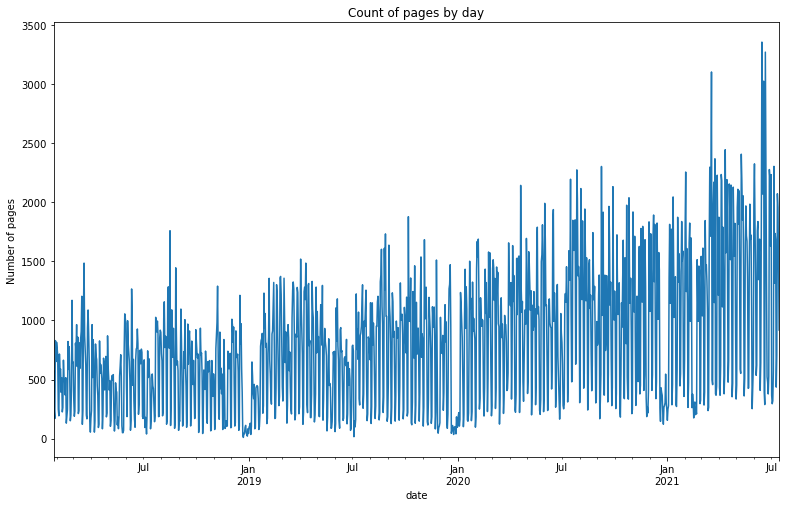

In [56]:
#plot pages
plt.figure(figsize=(13, 8))
pages.plot()
plt.title('Count of pages by day')
plt.ylabel("Number of pages") 
plt.show()

## Exponential Moving Average

In [ ]:
# 7 day EMA
ema_7d = pages.ewm(span = 7).mean()

In [ ]:
plt.figure(figsize=(13, 8))
ema_7d.plot()
plt.title('Count of pages by 7 days')
plt.ylabel("Number of pages") 
plt.show()


In [ ]:
# 14 days EMA
ema_14d = pages.ewm(span = 14).mean()


In [ ]:
plt.figure(figsize=(13, 8))
ema_14d.plot()
plt.title('Count of pages by 14 days')
plt.ylabel("Number of pages") 
plt.show()


In [ ]:
# 30 days EMA
ema_30d =pages.ewm(span = 30).mean()

In [ ]:
plt.figure(figsize=(13, 8))
ema_30d.plot()
plt.title('Count of pages by 30 days')
plt.ylabel("Number of pages") 
plt.show()


In [ ]:
# 90 days EMA
ema_90d = pages.ewm(span = 90 ).mean()

In [ ]:
plt.figure(figsize=(13, 8))
ema_90d.plot()
plt.title('Count of pages by 90 days')
plt.ylabel("Number of pages") 
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '90-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

In [ ]:
**takeaways**
- we can see at the end of each year the number of pages drops  drastically 

## Bollinger Bands and %b

In [ ]:
#set the window span
span = 30

#compute midband
midband = pages.ewm(span = 30).mean()
midband.head()

**Bonus:**

Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff?